<a href="https://colab.research.google.com/github/Slontus/data/blob/main/bli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Slontus/data/main/OECD_bli.csv"
oecd_bli_df = pd.read_csv(url)
oecd_bli_df = oecd_bli_df[oecd_bli_df['INEQUALITY'] == 'TOT']
oecd_bli_df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


In [2]:
url_gdp = "https://raw.githubusercontent.com/Slontus/data/main/gdp-per-capita-worldbank.csv"
gdp = pd.read_csv(url_gdp)
gdp2020 = gdp[gdp['Year'] == 2020]
gdp2020 = gdp2020.drop(['Year', "Code"], axis=1)
gdp2020.columns = ["Country", "GDP per cap (USD)"]
gdp2020.set_index("Country", inplace=True)
gdp2020.head()


,GDP per cap (USD)
Country,
Afghanistan,1970.560181
Albania,13191.952148
Algeria,10735.382812
Angola,6110.274414
Antigua and Barbuda,17293.302734


In [3]:
oecd_bli = pd.pivot_table(oecd_bli_df,  index="Country", columns = "Indicator", values = "Value")


print(oecd_bli.info())
oecd_bli.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Australia to United States
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Air pollution                                      42 non-null     float64
 1   Dwellings without basic facilities                 39 non-null     float64
 2   Educational attainment                             41 non-null     float64
 3   Employees working very long hours                  40 non-null     float64
 4   Employment rate                                    42 non-null     float64
 5   Feeling safe walking alone at night                42 non-null     float64
 6   Homicide rate                                      42 non-null     float64
 7   Household net adjusted disposable income           36 non-null     float64
 8   Household net wealth                               30 non-null     float64
 9 

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0


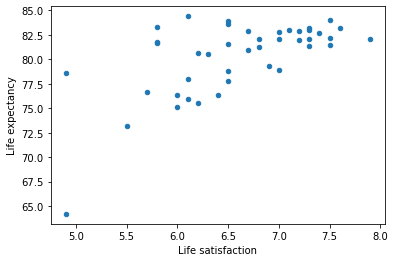

In [4]:
import matplotlib.pyplot as plt

oecd_bli_sample = oecd_bli[['Life satisfaction', 'Life expectancy']].dropna()
oecd_bli_sample.head()

oecd_bli_sample.plot(kind="scatter", x="Life satisfaction", y="Life expectancy")
plt.show()


In [5]:
full_data = pd.merge(left=oecd_bli, right = gdp2020, on="Country")
full_data

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per cap (USD)
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0,48678.683594
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0,51857.691406
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0,48769.726562
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0,14063.982422
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0,46064.253906
Chile,23.4,9.4,67.0,7.7,56.0,41.0,2.4,NaN,135787.0,18.4,...,88.0,1.9,60.0,1.3,438.0,NaN,47.0,62.0,17.0,23324.525391
Colombia,22.6,12.3,59.0,23.7,58.0,50.0,23.1,NaN,NaN,NaN,...,80.0,1.0,80.0,1.4,406.0,NaN,53.0,82.0,14.0,13448.932617
Costa Rica,17.5,2.3,43.0,22.0,55.0,47.0,10.0,16517.0,NaN,17.0,...,82.0,1.2,73.0,1.8,415.0,NaN,66.0,87.0,NaN,19903.140625
Denmark,10.0,0.5,82.0,1.1,74.0,85.0,0.5,33774.0,149864.0,23.3,...,95.0,1.9,70.0,2.0,501.0,NaN,85.0,93.0,19.0,55819.910156


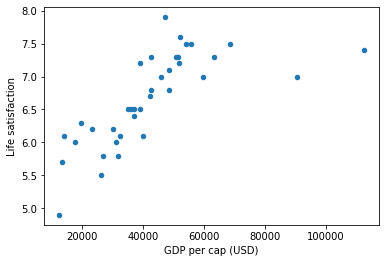

In [6]:
full_data.plot(kind='scatter', x='GDP per cap (USD)', y='Life satisfaction')
plt.show()

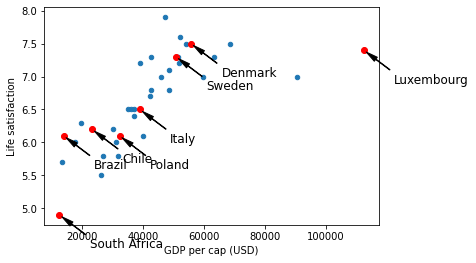

In [10]:
countries = ["Poland", "Luxembourg", "Sweden", "Chile", "Brazil", "Italy", "South Africa", "Denmark"]
countries_highlight = {country: (full_data['GDP per cap (USD)'].loc[country], full_data['Life satisfaction'].loc[country]) for country in countries}
full_data.plot(kind='scatter', x='GDP per cap (USD)', y='Life satisfaction')

for country, plot_point in countries_highlight.items():
    plt.annotate(country, xy=plot_point,
                 xytext=(plot_point[0] + 10000, plot_point[1] - 0.5), 
                 fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(*plot_point, "ro")
plt.show()

In [13]:
highlighted_countries = full_data.loc[countries]
highlighted_countries[['GDP per cap (USD)', 'Life satisfaction']].sort_values(by='GDP per cap (USD)')

,GDP per cap (USD),Life satisfaction
Country,,
South Africa,12665.832031,4.9
Brazil,14063.982422,6.1
Chile,23324.525391,6.2
Poland,32398.705078,6.1
Italy,39073.414062,6.5
Sweden,50923.109375,7.3
Denmark,55819.910156,7.5
Luxembourg,112557.312500,7.4


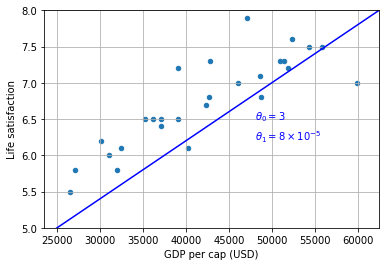

In [39]:
import numpy as np
min_gdp = 23_500
max_gdp = 62_500

part_data = full_data[(full_data['GDP per cap (USD)'] <= max_gdp) & (full_data['GDP per cap (USD)'] >= min_gdp)]

part_data.plot(kind='scatter', x='GDP per cap (USD)', y='Life satisfaction', grid=True)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 6.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 6.2, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, 5, 8])
plt.show()

In [37]:
from sklearn import linear_model
X_sample = part_data[['GDP per cap (USD)']].values
y_sample = part_data[['Life satisfaction']].values

model1 = linear_model.LinearRegression()
model1.fit(X_sample, y_sample)
t0, t1 = model1.intercept_[0], model1.coef_[0][0]
print(f"t0={t0:.2f}, t1={t1:.2e}")


t0=4.33, t1=5.73e-05


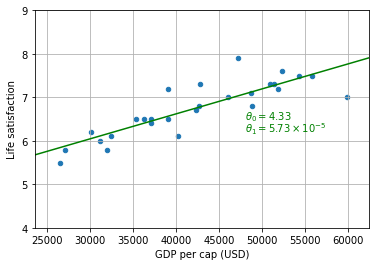

In [60]:
part_data.plot(kind='scatter', x='GDP per cap (USD)', y='Life satisfaction', grid=True)
X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1*X, color='g')
plt.text(48_000, 6.5, fr"$\theta_0 = {t0:.2f}$", color='g')
plt.text(48_000, 6.2, fr"$\theta_1 = {t1*1e5:.2f}\times 10^{{-5}}$", color='g')
plt.axis([min_gdp, max_gdp, 4, 9])
plt.show()

In [47]:
cyprus_gdp_per_capita = gdp2020['GDP per cap (USD)'].loc['Cyprus']
cyprus_gdp_per_capita

38816.09375

In [56]:
cyprus_predicted_life_satisfaction = model1.predict([[cyprus_gdp_per_capita]])
print(f'Predicted: {cyprus_predicted_life_satisfaction[0,0]:.2f}')


Predicted: 6.55


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


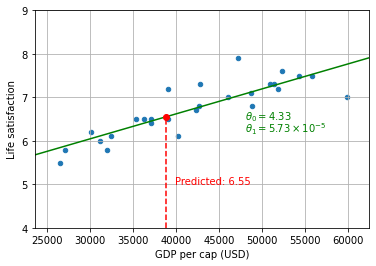

In [65]:
part_data.plot(kind='scatter', x='GDP per cap (USD)', y='Life satisfaction', grid=True)
X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1*X, color='g')
plt.text(48_000, 6.5, fr"$\theta_0 = {t0:.2f}$", color='g')
plt.text(48_000, 6.2, fr"$\theta_1 = {t1*1e5:.2f}\times 10^{{-5}}$", color='g')

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [4, cyprus_predicted_life_satisfaction], "r--")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, 'ro')
plt.text(cyprus_gdp_per_capita + 1000, 5, f'Predicted: {cyprus_predicted_life_satisfaction[0,0]:.2f}', color='r')

plt.axis([min_gdp, max_gdp, 4, 9])
plt.show()

In [71]:
missing_data = full_data[(full_data['GDP per cap (USD)'] > max_gdp) | (full_data['GDP per cap (USD)'] < min_gdp)]
missing_data = missing_data[['GDP per cap (USD)', 'Life satisfaction']]
missing_data.values

array([[1.40639824e+04, 6.10000000e+00],
       [2.33245254e+04, 6.20000000e+00],
       [1.34489326e+04, 5.70000000e+00],
       [1.99031406e+04, 6.30000000e+00],
       [9.07892188e+04, 7.00000000e+00],
       [1.12557312e+05, 7.40000000e+00],
       [1.78523594e+04, 6.00000000e+00],
       [6.35480000e+04, 7.30000000e+00],
       [1.26658320e+04, 4.90000000e+00],
       [6.87554375e+04, 7.50000000e+00]])

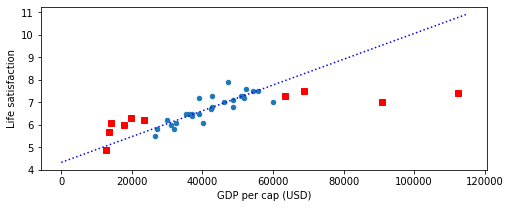

In [86]:
full_data.plot(kind='scatter', figsize=(8,3), x='GDP per cap (USD)', y='Life satisfaction')
for point_x, point_y in missing_data.values:
    plt.plot(point_x, point_y, 'rs')
    
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")
plt.show()
